In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import pickle
import sys
#from keras.models import load_model
#from keras import backend
import json
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter 
sys.path.append("../../src/visualization")
import esi_compare_viz
import esi_evaluation
sys.path.append("../../src/models/predict_model")
import predict_esi_rss



In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

## Read Data

In [3]:
df = json.load(open('../../data/result/Predictions_2009_DataForThresholds.json'))

#Keys are co_pred, rss_pred, ESI, rss, co_bin, co_type

In [4]:
ESI = df['ESI']
co_pred = df['co_pred']
rss_pred = df['rss_pred']
rss = df['rss']
co_bin = df['co_bin']
co_type = df['co_type']


## Resources Threshold and Number of Resources Calculation

In [5]:
#Keys are co_pred, rss_pred, ESI, rss, co_bin, co_type
rss_threshold = 0.35 # (ZL note: how come is .35? I think it has been taken from the baseline paper)
rss_max = [np.argmax(r) for r in rss_pred]
rss_comp = np.column_stack((rss_max,rss_pred))
rss_p = [predict_esi_rss.predict_rss(rmax,r0,r1,r2,rss_threshold) for rmax,r0,r1,r2 in rss_comp]
print(Counter(rss_p))

Counter({2.0: 14785, 0.0: 6650, 1: 2886})


## ESI Thresholds

In [6]:
top_n = 0.1  # 10% will go for esi-1 and esi-2

### What if we made the thresholds (ESI 1: 1%, ESI 2: 9%, ESI 3-5 by resources)?

In [7]:
reload(predict_esi_rss)

<module 'predict_esi_rss' from '../../src/models/predict_model\predict_esi_rss.pyc'>

In [8]:
co_pred_sorted= sorted(range(len(co_pred)), key=lambda i: co_pred[i], reverse=True)
top_n_perc = co_pred_sorted[0:int(len(co_pred)*top_n)]
threshold_top_n_perc  = co_pred[top_n_perc[len(top_n_perc)-1]]

In [9]:
co_pred_sorted[3]

973

In [10]:
top_n_perc[len(top_n_perc)-1]

23353

In [11]:
threshold_top_n_perc

0.7484203577041626

In [12]:
esi1_ratio_top_10_perc = 0.1
ESI_1_threshold, ESI_2_threshold, new_esi = \
predict_esi_rss.get_ESI_thresholds( co_pred, co_type, ESI, rss_p, top_n,esi1_ratio_top_10_perc)

Top CO probability value: 0.970660
Bottom of new ESI 2 range: 0.748420
Top of new ESI 3 range: 0.748019
Bottom CO probability value: 0.006404
--------------------------------------------------
('mean of esi_1_2_flag: ', 0.099995888326960242)
('CO type for co_pred in potential esi 1 and 2:', Counter({u'None': 1567, u'ICU': 749, u'Mortality': 81, u'OR_CATH': 35}))
('Assigned ESI for co_pred in potential esi 1 and 2:', Counter({3: 1311, 2: 704, 4: 271, 1: 101, 5: 45}))
--------------------------------------------------
col_0       1    2    3    4   5
row_0                           
ICU        37  275  381   46  10
Mortality  21   30   23    5   2
None       40  384  892  219  32
OR_CATH     3   15   15    1   1
--------------------------------------------------
Bottom of new ESI 1 range: 0.922265
Bottom of new ESI 2 range 0.748420
--------------------------------------------------
('New ESI:', Counter({3: 12355, 5: 6649, 4: 2886, 2: 2189, 1: 242}))


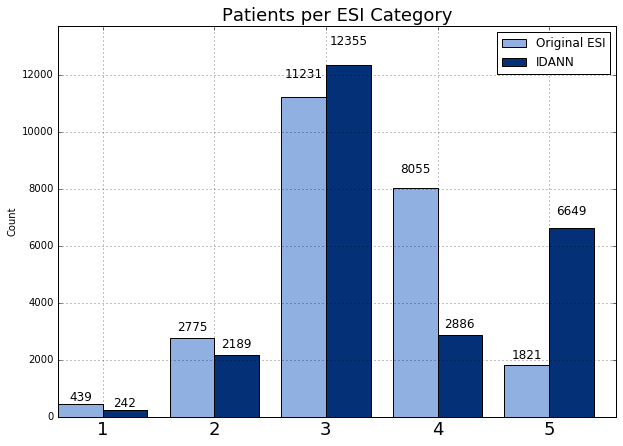

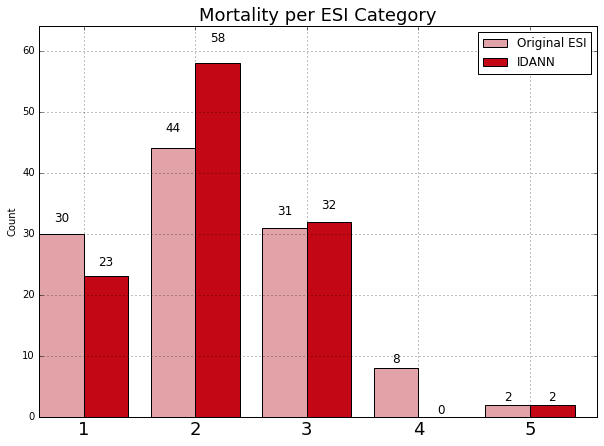

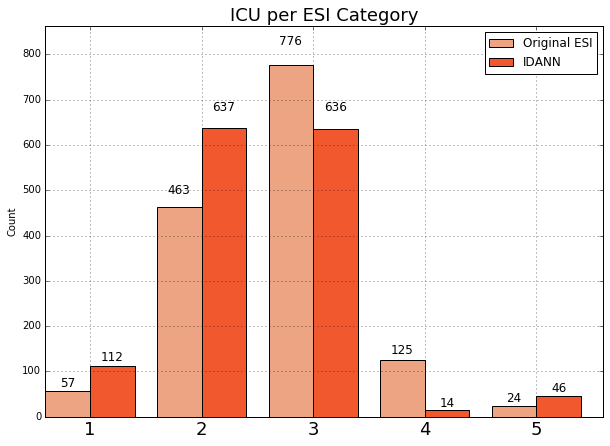

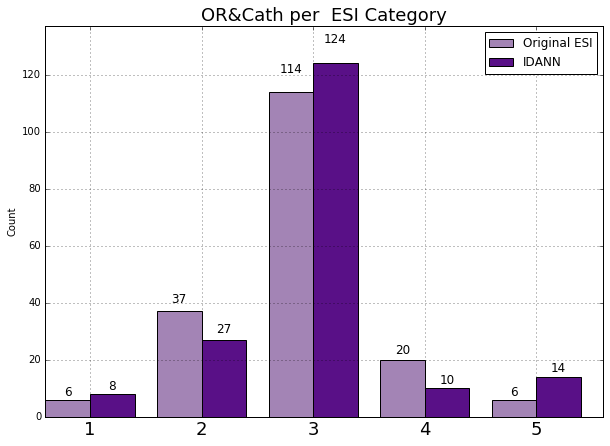

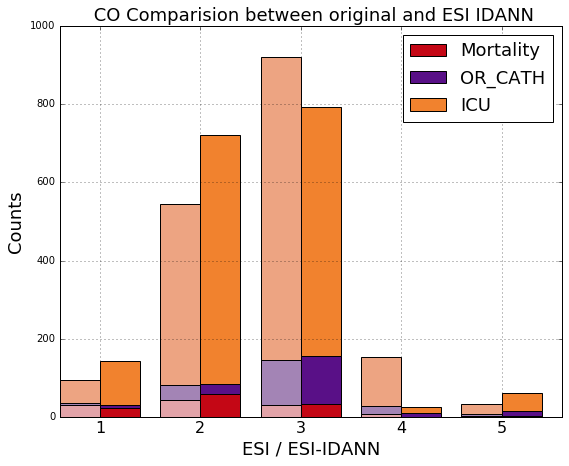

In [13]:
data_tuples = list(zip(ESI, co_pred, rss_pred, co_bin, co_type, new_esi))
cdc_info = pd.DataFrame(data_tuples, columns=['ESI', 'co_pred','rss_pred','co_bin','co_type','new_esi'])
esi_compare_viz.show_esi_compare_viz(cdc_info)

In [14]:
esi_evaluation.show_tp_fp_rates( cdc_info)

Baseline true positive rate: 36.546185%
True positive rate: 49.627080%
Baseline false positive rate: 11.413766%
False positive rate: 6.935955%


Critical Outcome to New ESI
{1: 242, 2: 2189, 3: 12355, 4: 2886, 5: 6649}


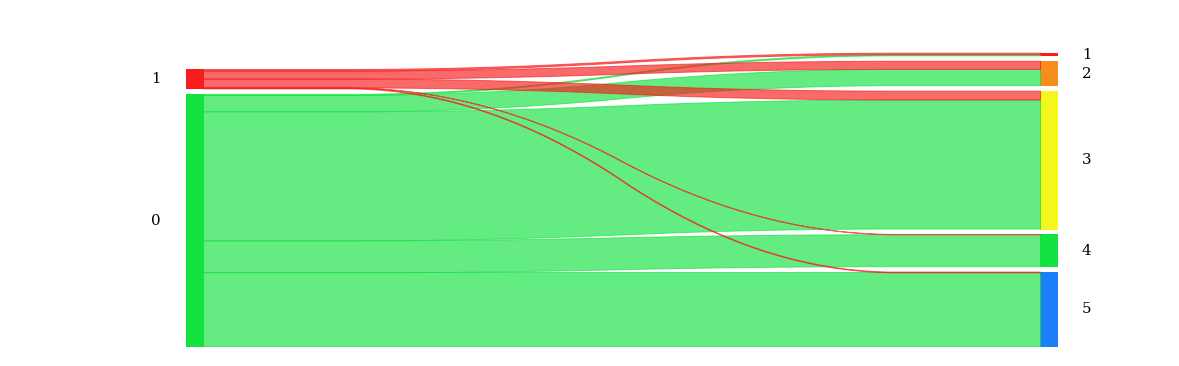

----------------------------------------------------------------------------------------------------
Actual Resources to new ESI
{1: 242, 2: 2189, 3: 12355, 4: 2886, 5: 6649}


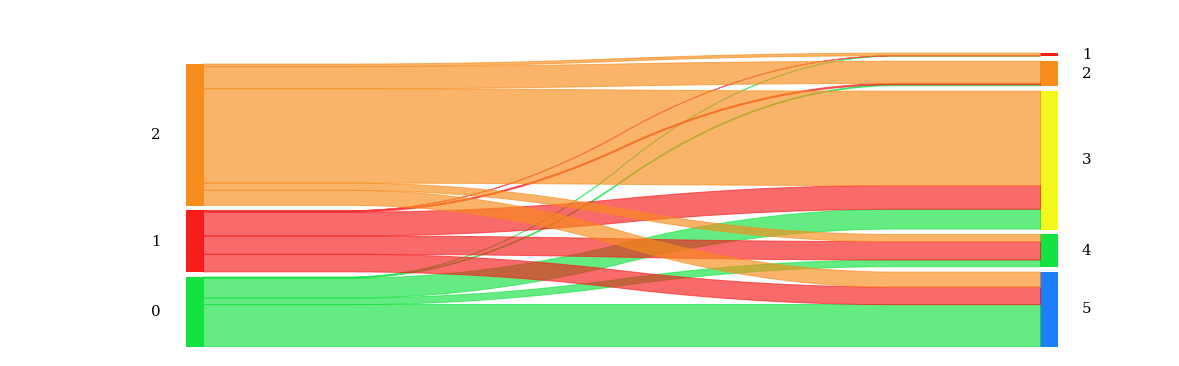

----------------------------------------------------------------------------------------------------
Actual Resources to Previous ESI
{1: 439, 2: 2775, 3: 11231, 4: 8055, 5: 1821}


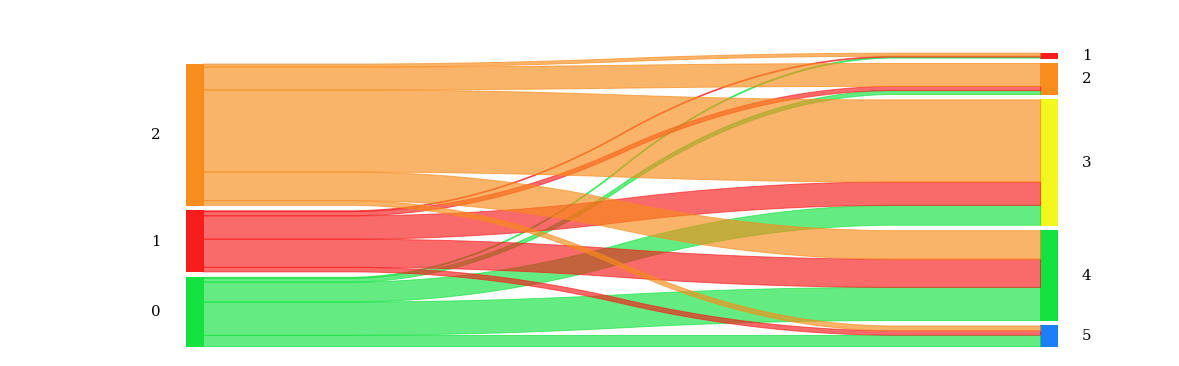

----------------------------------------------------------------------------------------------------
Previous ESI to New ESI
{1: 439, 2: 2775, 3: 11231, 4: 8055, 5: 1821}
{1: 242, 2: 2189, 3: 12355, 4: 2886, 5: 6649}


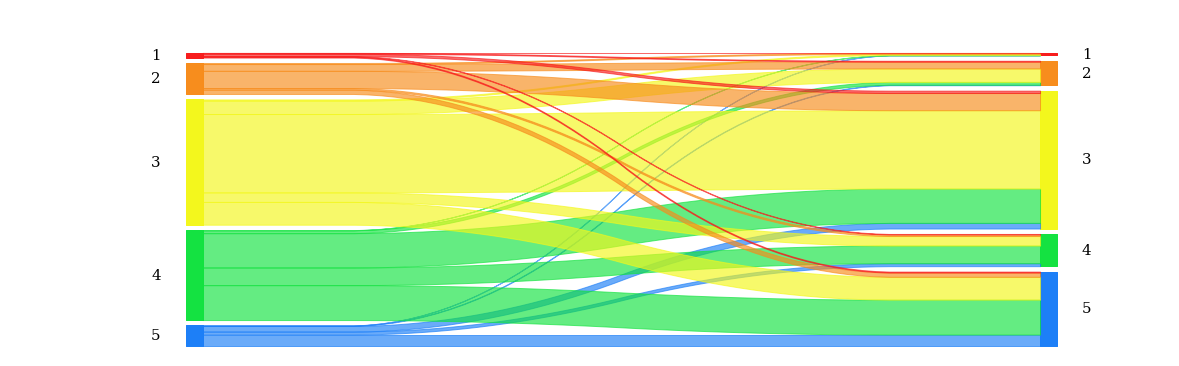

In [15]:
esi_compare_viz.show_sankeys(new_esi, co_bin, rss, ESI)

## Second set of Thresholds

### What if we made the thresholds (ESI 1: 1.8%, ESI 2: 8.2%, ESI 3-5 by resources)?

In [16]:
esi1_ratio_top_10_perc = 0.18
ESI_1_threshold, ESI_2_threshold, new_esi = predict_esi_rss.get_ESI_thresholds( co_pred, co_type, ESI, rss_p, top_n,esi1_ratio_top_10_perc)

Top CO probability value: 0.970660
Bottom of new ESI 2 range: 0.748420
Top of new ESI 3 range: 0.748019
Bottom CO probability value: 0.006404
--------------------------------------------------
('mean of esi_1_2_flag: ', 0.099995888326960242)
('CO type for co_pred in potential esi 1 and 2:', Counter({u'None': 1567, u'ICU': 749, u'Mortality': 81, u'OR_CATH': 35}))
('Assigned ESI for co_pred in potential esi 1 and 2:', Counter({3: 1311, 2: 704, 4: 271, 1: 101, 5: 45}))
--------------------------------------------------
col_0       1    2    3    4   5
row_0                           
ICU        37  275  381   46  10
Mortality  21   30   23    5   2
None       40  384  892  219  32
OR_CATH     3   15   15    1   1
--------------------------------------------------
Bottom of new ESI 1 range: 0.902652
Bottom of new ESI 2 range 0.748420
--------------------------------------------------
('New ESI:', Counter({3: 12355, 5: 6649, 4: 2886, 2: 1995, 1: 436}))


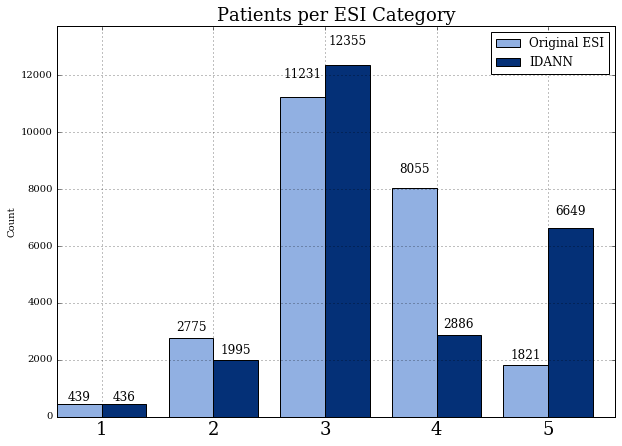

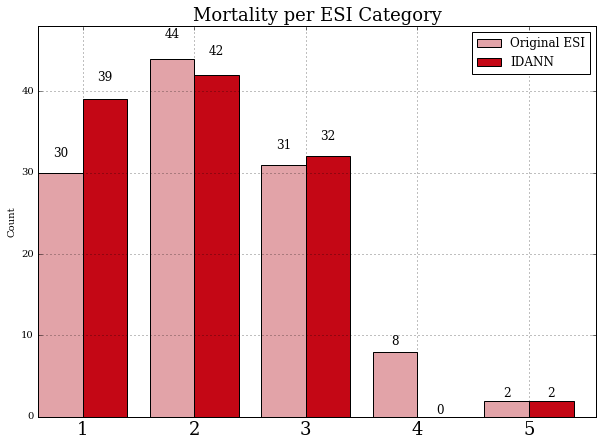

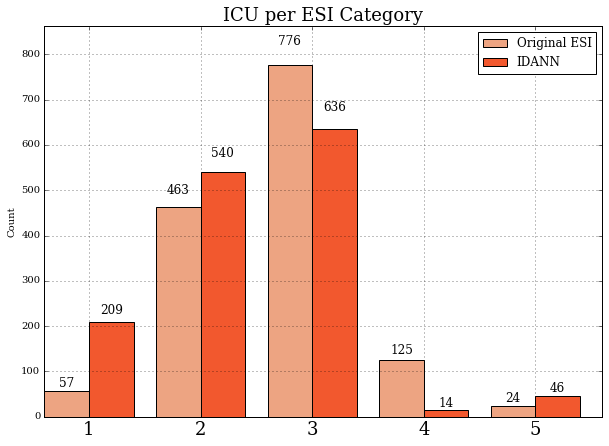

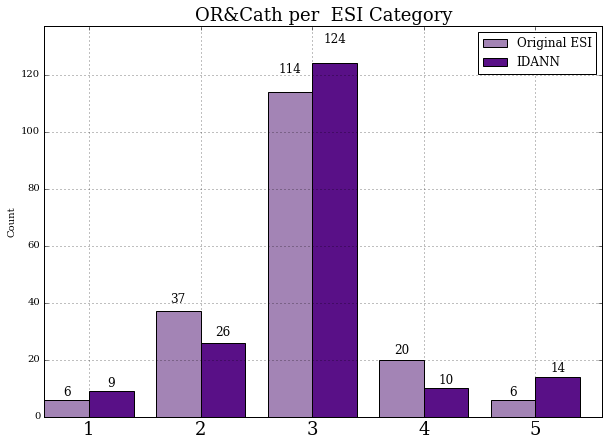

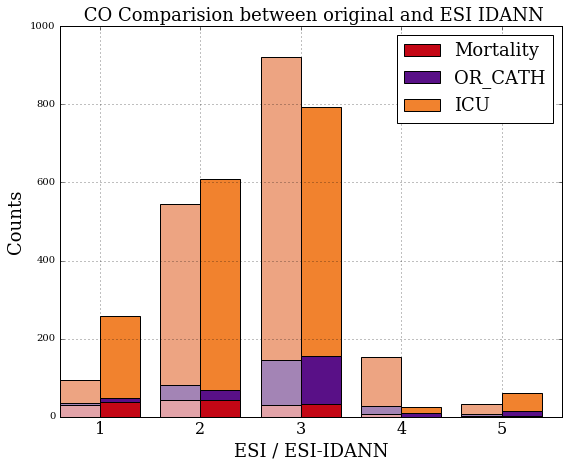

In [17]:
data_tuples = list(zip(ESI, co_pred, rss_pred, co_bin, co_type, new_esi))
cdc_info = pd.DataFrame(data_tuples, columns=['ESI', 'co_pred','rss_pred','co_bin','co_type','new_esi'])
esi_compare_viz.show_esi_compare_viz(cdc_info)

In [18]:
esi_evaluation.show_tp_fp_rates( cdc_info)

Baseline true positive rate: 36.546185%
True positive rate: 49.627080%
Baseline false positive rate: 11.413766%
False positive rate: 6.935955%


Critical Outcome to New ESI
{1: 436, 2: 1995, 3: 12355, 4: 2886, 5: 6649}


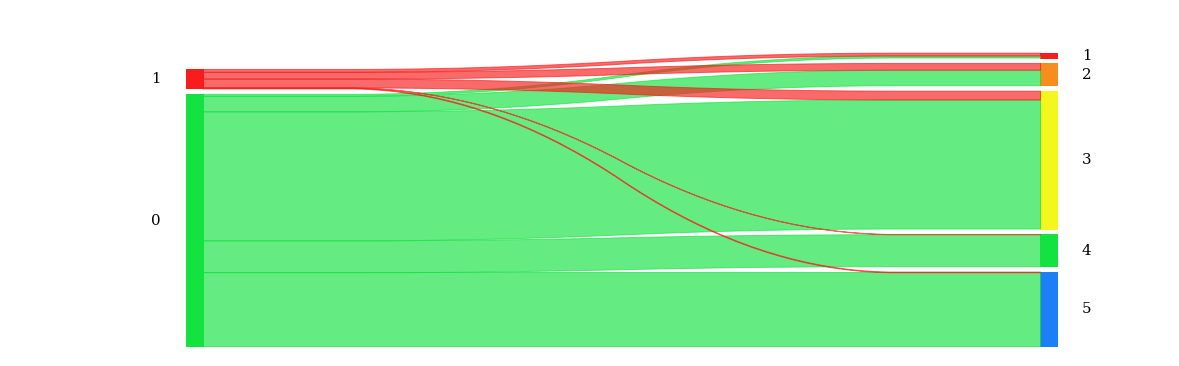

----------------------------------------------------------------------------------------------------
Actual Resources to new ESI
{1: 436, 2: 1995, 3: 12355, 4: 2886, 5: 6649}


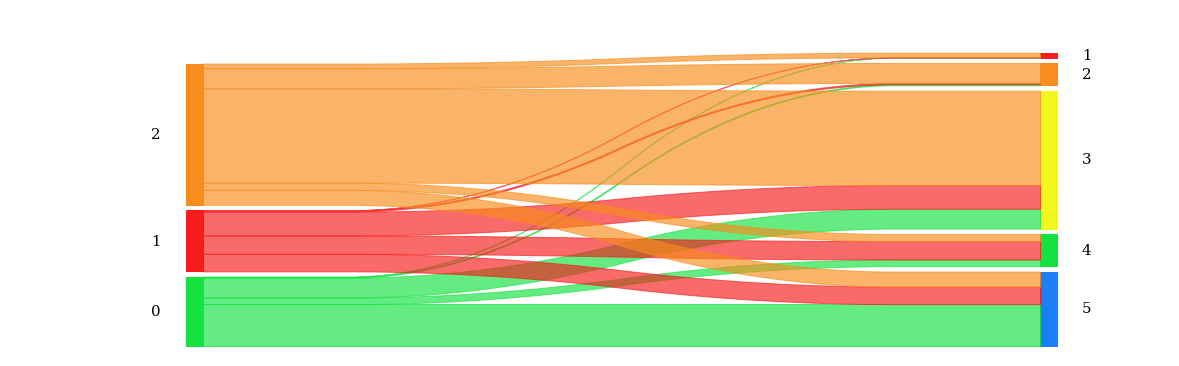

----------------------------------------------------------------------------------------------------
Actual Resources to Previous ESI
{1: 439, 2: 2775, 3: 11231, 4: 8055, 5: 1821}


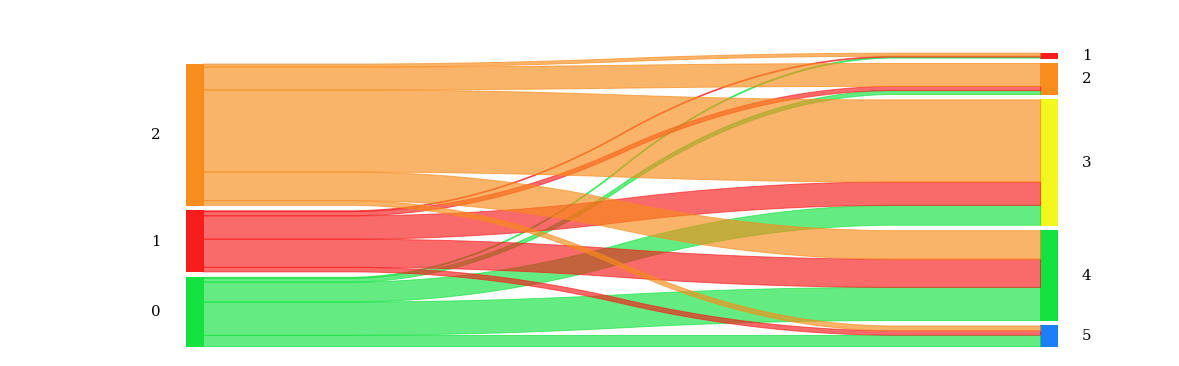

----------------------------------------------------------------------------------------------------
Previous ESI to New ESI
{1: 439, 2: 2775, 3: 11231, 4: 8055, 5: 1821}
{1: 436, 2: 1995, 3: 12355, 4: 2886, 5: 6649}


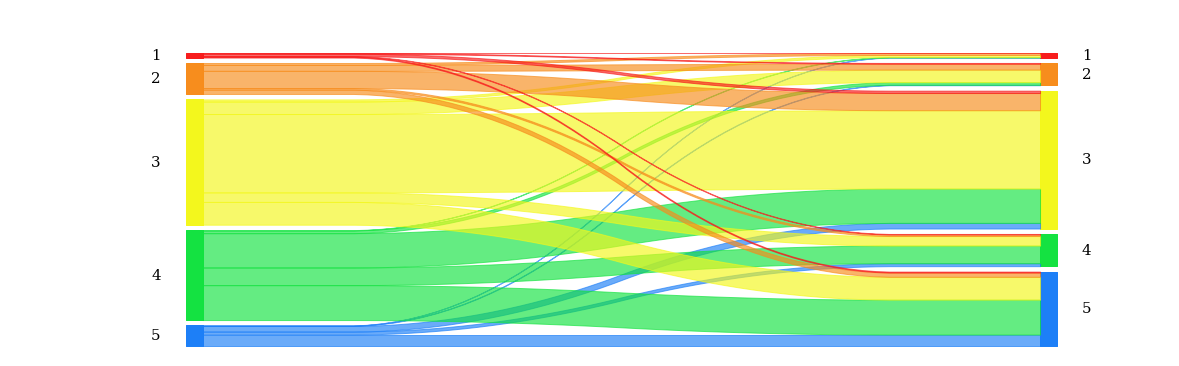

In [19]:
esi_compare_viz.show_sankeys(new_esi, co_bin, rss, ESI)

### What if we made the thresholds (ESI 1: 2%, ESI 2: 8%, ESI 3-5 30% each)?

In [20]:
esi1_ratio_top_10_perc = 0.2
ESI_1_threshold, ESI_2_threshold, new_esi = predict_esi_rss.get_ESI_thresholds( co_pred, co_type, ESI, rss_p, top_n,esi1_ratio_top_10_perc)

Top CO probability value: 0.970660
Bottom of new ESI 2 range: 0.748420
Top of new ESI 3 range: 0.748019
Bottom CO probability value: 0.006404
--------------------------------------------------
('mean of esi_1_2_flag: ', 0.099995888326960242)
('CO type for co_pred in potential esi 1 and 2:', Counter({u'None': 1567, u'ICU': 749, u'Mortality': 81, u'OR_CATH': 35}))
('Assigned ESI for co_pred in potential esi 1 and 2:', Counter({3: 1311, 2: 704, 4: 271, 1: 101, 5: 45}))
--------------------------------------------------
col_0       1    2    3    4   5
row_0                           
ICU        37  275  381   46  10
Mortality  21   30   23    5   2
None       40  384  892  219  32
OR_CATH     3   15   15    1   1
--------------------------------------------------
Bottom of new ESI 1 range: 0.896729
Bottom of new ESI 2 range 0.748420
--------------------------------------------------
('New ESI:', Counter({3: 12355, 5: 6649, 4: 2886, 2: 1946, 1: 485}))


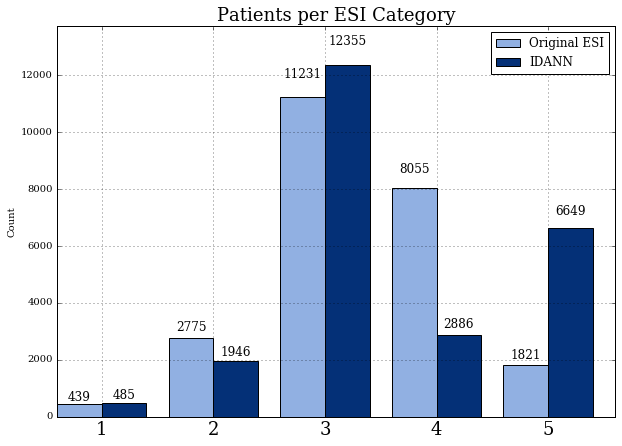

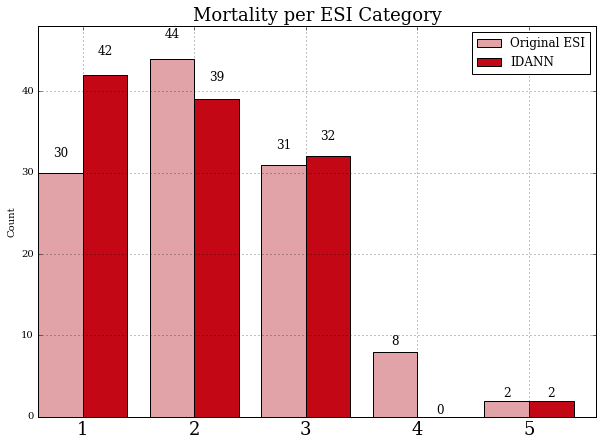

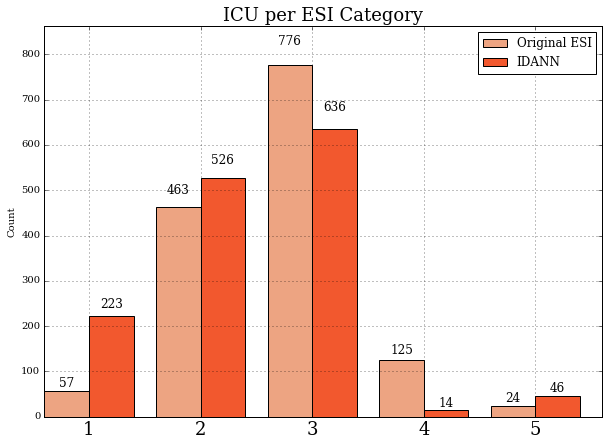

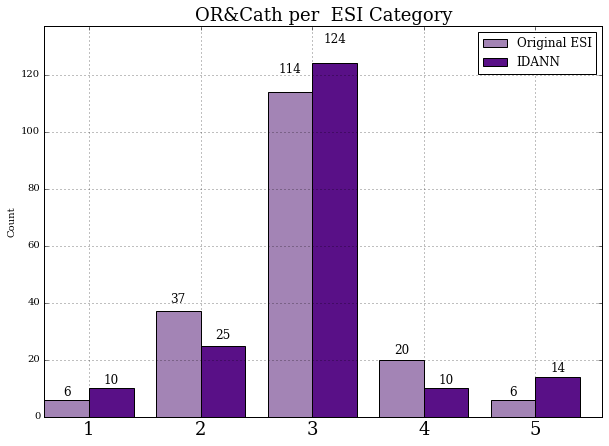

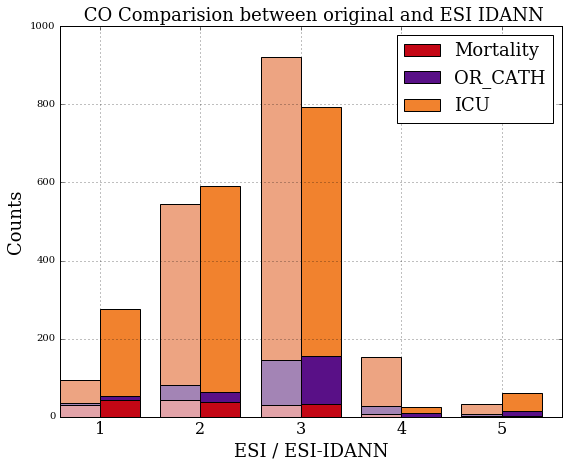

In [21]:
data_tuples = list(zip(ESI, co_pred, rss_pred, co_bin, co_type, new_esi))
cdc_info = pd.DataFrame(data_tuples, columns=['ESI', 'co_pred','rss_pred','co_bin','co_type','new_esi'])
esi_compare_viz.show_esi_compare_viz(cdc_info)

In [22]:
esi_evaluation.show_tp_fp_rates( cdc_info)

Baseline true positive rate: 36.546185%
True positive rate: 49.627080%
Baseline false positive rate: 11.413766%
False positive rate: 6.935955%


Critical Outcome to New ESI
{1: 485, 2: 1946, 3: 12355, 4: 2886, 5: 6649}


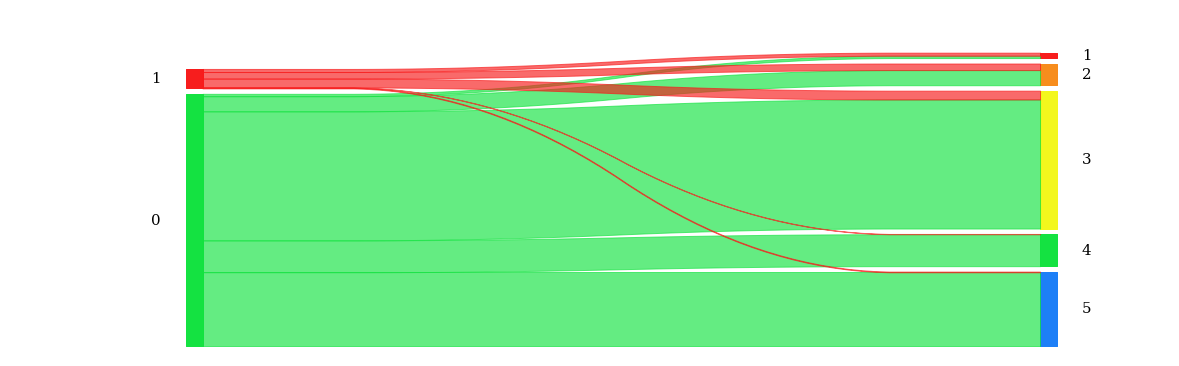

----------------------------------------------------------------------------------------------------
Actual Resources to new ESI
{1: 485, 2: 1946, 3: 12355, 4: 2886, 5: 6649}


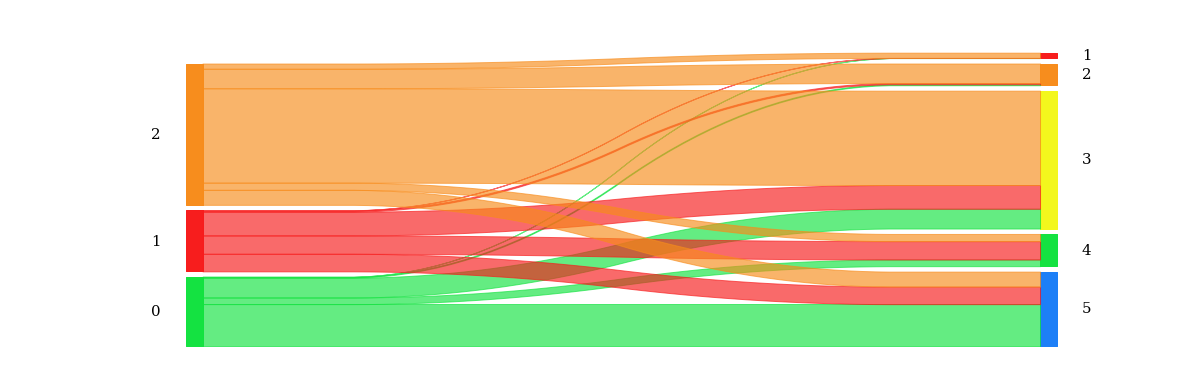

----------------------------------------------------------------------------------------------------
Actual Resources to Previous ESI
{1: 439, 2: 2775, 3: 11231, 4: 8055, 5: 1821}


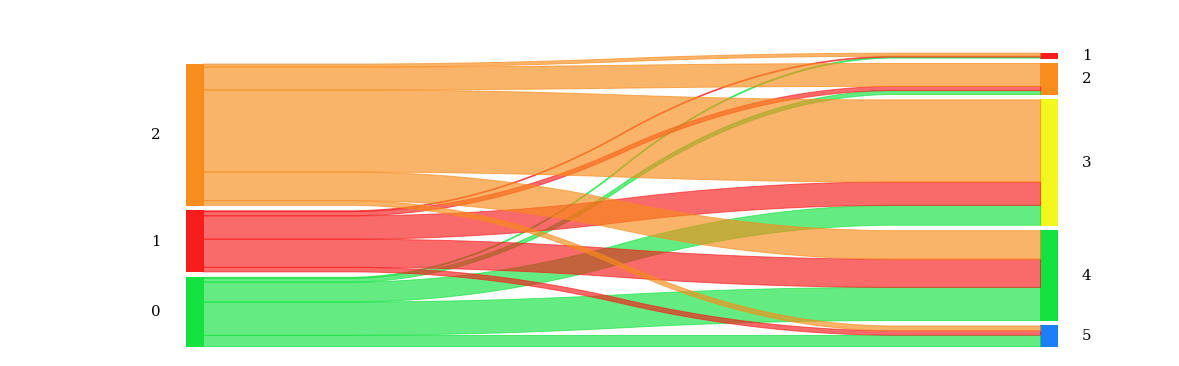

----------------------------------------------------------------------------------------------------
Previous ESI to New ESI
{1: 439, 2: 2775, 3: 11231, 4: 8055, 5: 1821}
{1: 485, 2: 1946, 3: 12355, 4: 2886, 5: 6649}


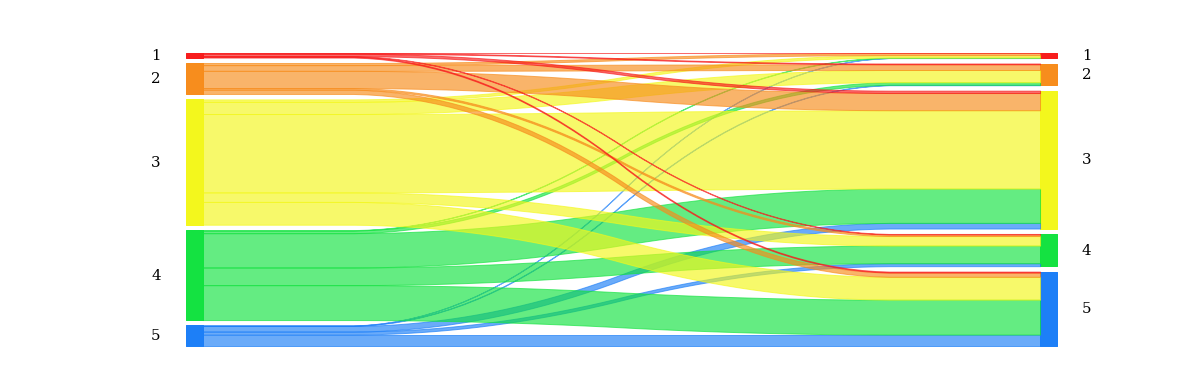

In [23]:
esi_compare_viz.show_sankeys(new_esi, co_bin, rss, ESI)

### What if we made the thresholds (ESI 1: 2.5%, ESI 2: 10%, ESI 3-5 based on resources)?

In [31]:
top_n=  0.125
esi1_ratio_top_n_perc = 0.25
ESI_1_threshold, ESI_2_threshold, new_esi = predict_esi_rss.get_ESI_thresholds( co_pred, co_type, ESI, rss_p, top_n,esi1_ratio_top_n_perc)

Top CO probability value: 0.970660
Bottom of new ESI 2 range: 0.704356
Top of new ESI 3 range: 0.703754
Bottom CO probability value: 0.006404
--------------------------------------------------
('mean of esi_1_2_flag: ', 0.1249948604087003)
('CO type for co_pred in potential esi 1 and 2:', Counter({u'None': 2050, u'ICU': 856, u'Mortality': 93, u'OR_CATH': 41}))
('Assigned ESI for co_pred in potential esi 1 and 2:', Counter({3: 1663, 2: 848, 4: 351, 1: 119, 5: 59}))
--------------------------------------------------
col_0       1    2     3    4   5
row_0                            
ICU        41  314   438   53  10
Mortality  24   37    23    7   2
None       51  481  1182  290  46
OR_CATH     3   16    20    1   1
--------------------------------------------------
Bottom of new ESI 1 range: 0.870969
Bottom of new ESI 2 range 0.704356
--------------------------------------------------
('New ESI:', Counter({3: 11747, 5: 6649, 4: 2886, 2: 2280, 1: 759}))


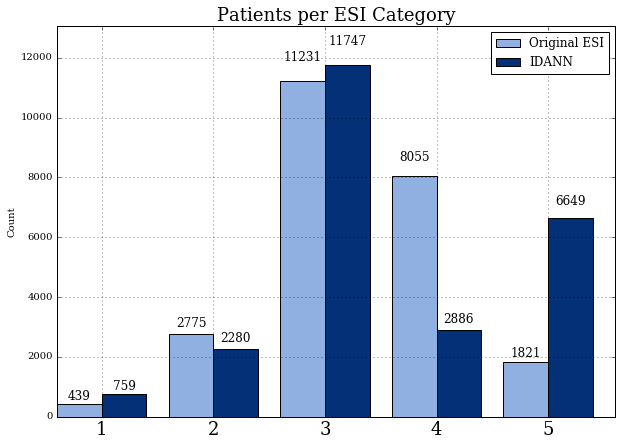

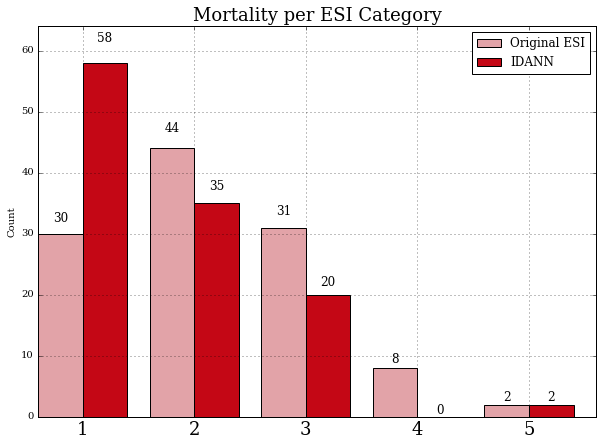

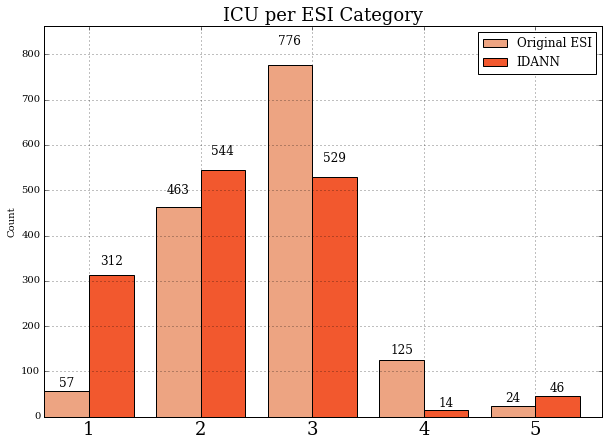

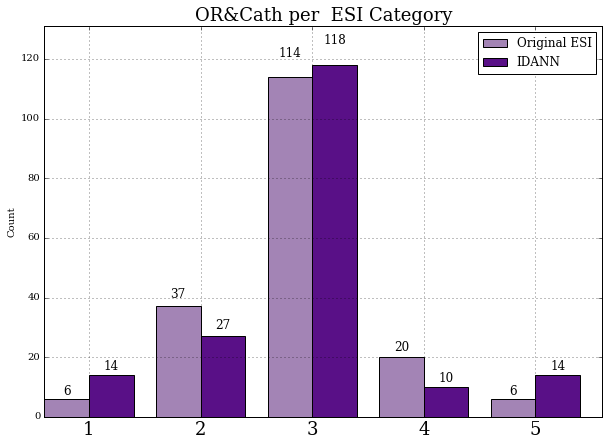

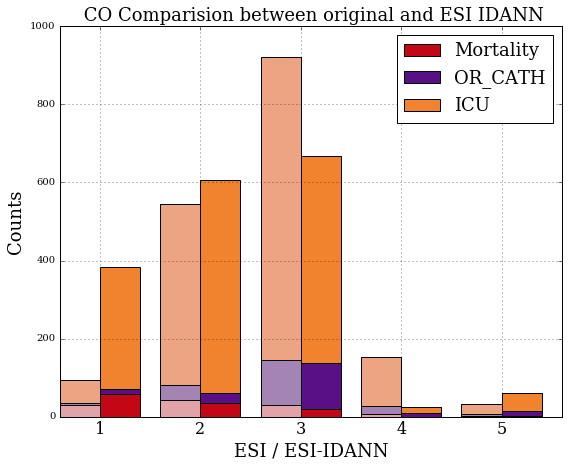

In [32]:
data_tuples = list(zip(ESI, co_pred, rss_pred, co_bin, co_type, new_esi))
cdc_info = pd.DataFrame(data_tuples, columns=['ESI', 'co_pred','rss_pred','co_bin','co_type','new_esi'])
esi_compare_viz.show_esi_compare_viz(cdc_info)

In [33]:
esi_evaluation.show_tp_fp_rates( cdc_info)

Baseline true positive rate: 36.546185%
True positive rate: 56.798623%
Baseline false positive rate: 11.413766%
False positive rate: 9.075206%


Critical Outcome to New ESI
{1: 759, 2: 2280, 3: 11747, 4: 2886, 5: 6649}


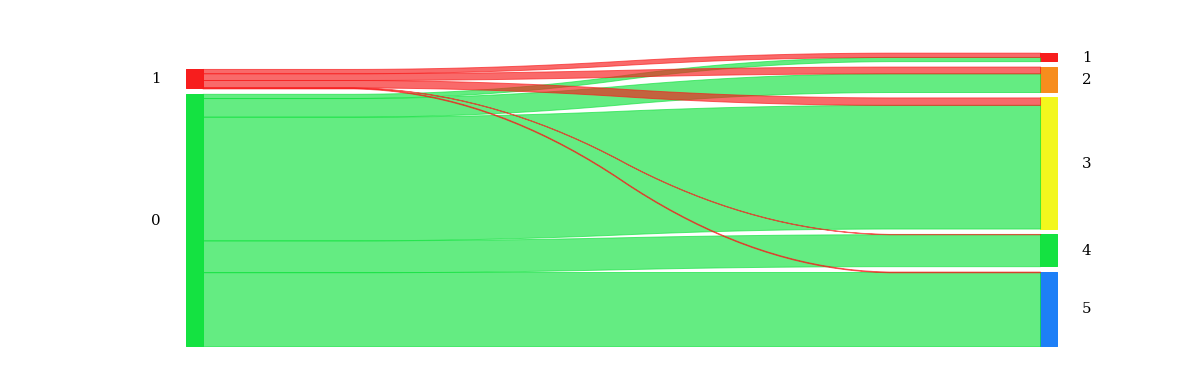

----------------------------------------------------------------------------------------------------
Actual Resources to new ESI
{1: 759, 2: 2280, 3: 11747, 4: 2886, 5: 6649}


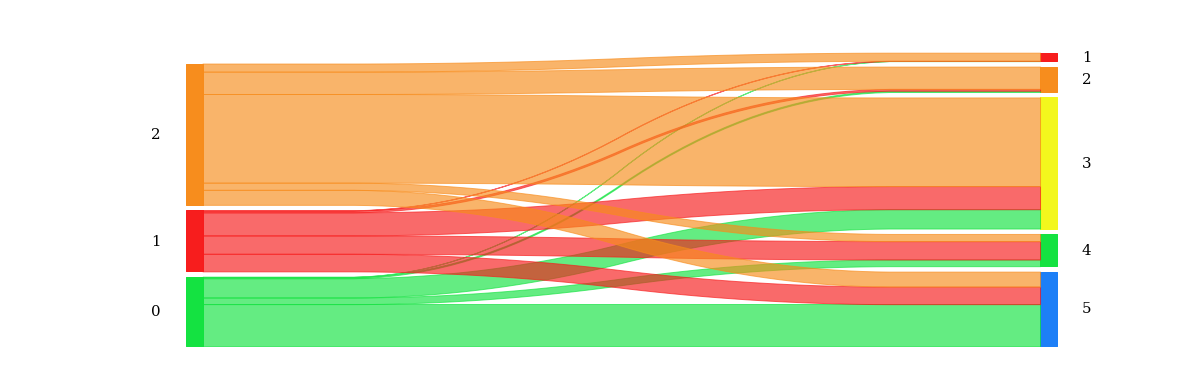

----------------------------------------------------------------------------------------------------
Actual Resources to Previous ESI
{1: 439, 2: 2775, 3: 11231, 4: 8055, 5: 1821}


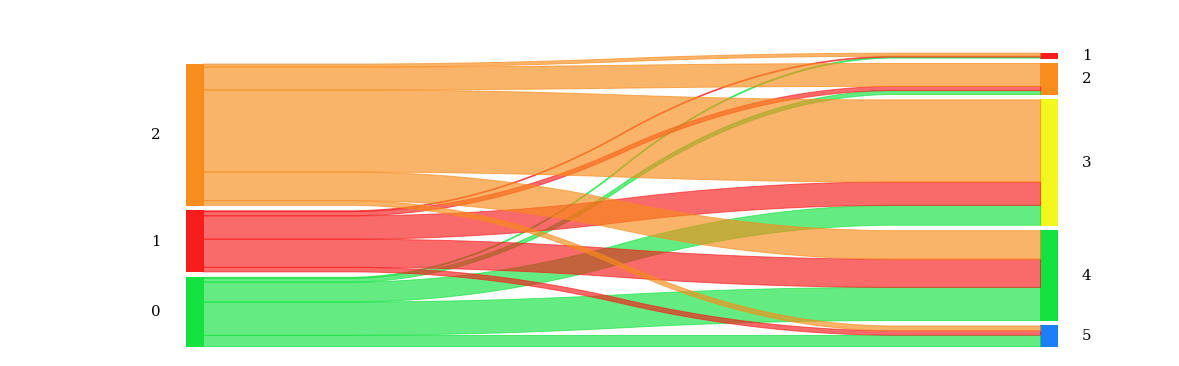

----------------------------------------------------------------------------------------------------
Previous ESI to New ESI
{1: 439, 2: 2775, 3: 11231, 4: 8055, 5: 1821}
{1: 759, 2: 2280, 3: 11747, 4: 2886, 5: 6649}


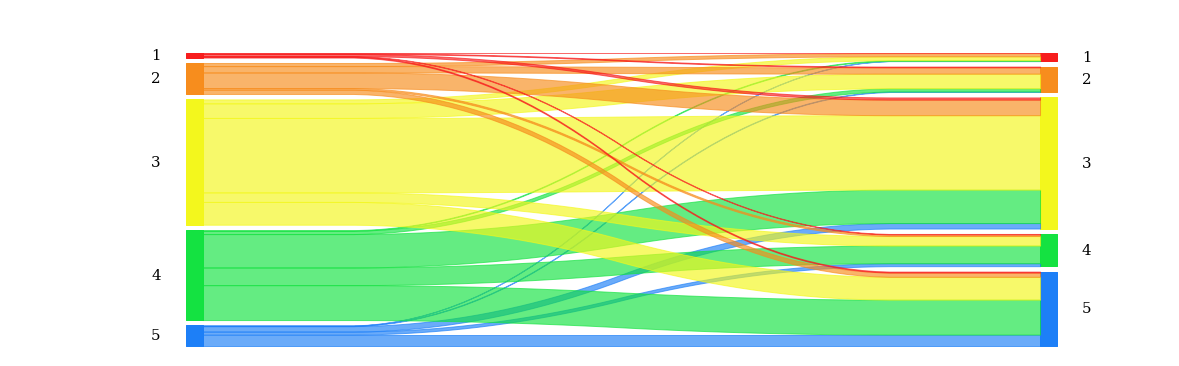

In [34]:
esi_compare_viz.show_sankeys(new_esi, co_bin, rss, ESI)

## Saving chosen ESI thresholds for later processing

In [35]:
with open('../../fileConfig.json') as config_file:    
        fileConfig = json.load(config_file)
fileESIThreshold_location = fileConfig['dataDirectory'] + fileConfig['resultDirectory'] + 'esi_thresholds.json'        

In [36]:
data = {}
data['esi1_threshold'] = ESI_1_threshold
data['esi2_threshold'] = ESI_2_threshold
data['rss_threshold'] = rss_threshold
with open(fileESIThreshold_location, 'w') as fp:
    json.dump(data, fp)

In [37]:
print data

{'esi1_threshold': 0.8709694147109985, 'rss_threshold': 0.35, 'esi2_threshold': 0.7043555974960327}
